Fuzzy number algebra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_fuzzy_profile():
    p = [ np.random.randint(0,6) for _ in range(4)]
    return sorted(p)

In [3]:
def add_trapezoidal_fuzzy_numbers(p,q):
    return [x+y for x,y in zip(p,q)]

def rescale_trapezoidal_fuzzy_numbers(p,alpha):
    return [x*alpha for x in p]

Plot functions

In [4]:
def prepare_plot(p_1,p_2,p_3,p_4, res=20):
    res_end = res + 1
    if p_1 == p_2 :
        y_left_edge = [i/res for i in range(res_end)]
        x_left_edge = [p_1 for _ in range(res_end)]
    else :
        y_left_edge = [i/res for i in range(res_end) ]
        x_left_edge = [p_1 + (p_2-p_1)*i/res for i in range(res_end)]
    if p_2 == p_3:
        y_plateau = [1]
        x_plateau = [p_3]
    else:
        y_plateau = [1 for i in range(res_end) ]
        x_plateau = [p_2 + (p_3-p_2)*i/res for i in range(res_end)]
    if p_3 == p_4:
        y_right_edge = [i/res for i in range(res_end)]
        x_right_edge = [p_3 for i in range(res_end)]
    else:
        y_right_edge = [(1 - i/res) for i in range(res_end)]
        x_right_edge = [p_3 + (p_4-p_3)*i/res for i in range(res_end)]
    x = x_left_edge + x_plateau + x_right_edge
    y = y_left_edge + y_plateau + y_right_edge
    return x, y

In [5]:
def plot_trapezoidal_fuzzy_number(p_1,p_2,p_3,p_4, res=20, set_axes_lim=False):
    x, y = prepare_plot(p_1,p_2,p_3,p_4, res=20)
    if set_axes_lim:
        plt.xlim(0,1)
        plt.ylim(0,1.1)
    plt.plot(x,y)

In [6]:
create_fuzzy_profile()

[1, 2, 4, 4]

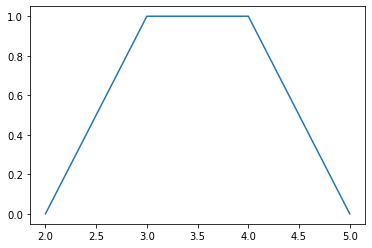

In [7]:
plot_trapezoidal_fuzzy_number(2,3,4,5)

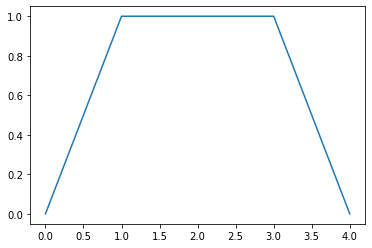

In [9]:
plot_trapezoidal_fuzzy_number(*create_fuzzy_profile())

[4, 5, 10, 10]


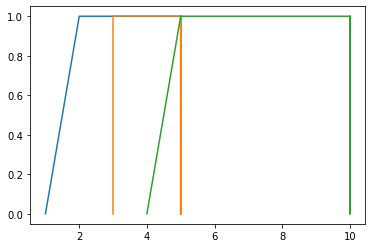

In [10]:
p=(1,2,5,5)
q=(3,3,5,5)
r = add_trapezoidal_fuzzy_numbers(p,q)
print(r)
plot_trapezoidal_fuzzy_number(*p)
plot_trapezoidal_fuzzy_number(*q)
plot_trapezoidal_fuzzy_number(*r)

Simulations of visitors behavior

In [11]:
def split_visitors(n,ratio):
    """ splits population of n visitors according to ratio"""
    m = (np.random.rand(n) < ratio).sum()
    return m, n-m

In [12]:
split_visitors(10000,.3)

(3023, 6977)

In [13]:
def create_risk_sensitive_visitor_fuzzy_profile(mq1, mq2, s):
    q1, q2 = 0, 0
    while (q1 == 0 and q2 == 0):
        q1 = max(np.random.normal(mq1,s),0)
        q2 = max(np.random.normal(mq2,s),0)
        if q2 <= q1:
            q1 = q2
    return [q1,q2,5,5]

def simulate_risk_sensitive_visitor_behaviour(q, mean_review):
    """ 
    inputs:
        - q: list of length 4 (legs of trapezoïdal fuzzy number), 
            of the form [q_1, q_2, 5, 5] (with 0<=q_1<=q_2<=5)
        - average_review: float in range [0,5]
    output:
        - [bool, bool]
            first bool is order behaviour (True: visitor ordered, False: didn't order)
            second bool is hesitation (True: visitor hesitated, False: didn't hesitate)
    """
    q_1, q_2 = q[0],q[1]
    if q_1 >= mean_review:
        return [False, False]
    if q_2 <= mean_review:
        return [True, False]
    test = q_1 + (q_2-q_1)*np.random.random()
    if test > (q_2 - mean_review):
        return [True, True]
    else:
        return [False,True]  
    
def compute_fuzzy_p(n_ric,n_1_rsc,n_2_rsc,n_rip,n_1_rsp,n_2_rsp):
    n = n_ric + n_1_rsc + n_2_rsc + n_rip + n_1_rsp + n_2_rsp
    p_1 = n_1_rsc/n
    p_2 = p_1 + n_2_rsc/n
    p_3 = p_2 + n_1_rsp/n
    p_4 = p_3 + n_2_rsp/n
    return [p_1,p_2,p_3,p_4]

In [14]:
def simulate_site_visitors_behavior(mean_review, 
                                    n_visitors=10000, 
                                    prospects_customers_ratio=0.2,
                                    ric_rsc_ratio=0.3,
                                    rs_customer_stats=(1.5,2.5,1.),
                                    rip_rsp_ratio=0.05,
                                    rs_prospect_stats=(3.,4.,1.)
                                   ):
    """
    inputs:
        - mean_review: float in range [0,5]
        - n_visitors: integer, default=10,000
        - prospects_customers_ration: float in range [0,1], 
            default=0.2 (20% of visitors are prospects)
        - ric_rsc_ratio: float in range [0,1], 
            default=0.3 (30% of customers are risk-insensitive)
        - rs_customer_stats: tuple with mean q_1, mean q_2, sdev for rs-customers, 
            default=(1.5,2.5,1.)
        - rip_rsp_ratio: float in range [0,1], 
            default=0.05 (5% of prospects are risk-insensitive)
        - rs_prospect_stats: tuple with mean q_1, mean q_2, sdev for rs-prospects, 
            default=(2.,3.,1.)
    outputs: 
        - (n_ric,n_0_c,n_1_rsc,n_2_rsc)
        - (n_rip,n_0_p,n_1_rsp,n_2_rsp)
        - p : fuzzy p
    """
    
    # split visitors
    n_prospects, n_customers = split_visitors(n_visitors, prospects_customers_ratio)
    n_ric, n_rsc = split_visitors(n_customers,ric_rsc_ratio)
    n_rip, n_rsp = split_visitors(n_prospects,rip_rsp_ratio)
    
    # generate risk-sensitive customers and prospects
    rs_customers = [create_risk_sensitive_visitor_fuzzy_profile(*rs_customer_stats) 
                    for _ in range(n_rsc)]
    rs_prospects = [create_risk_sensitive_visitor_fuzzy_profile(*rs_prospect_stats) 
                    for _ in range(n_rsp)]
    
    # determine risk-sensitive customers and prospects behaviour
    rs_customer_behaviours = [simulate_risk_sensitive_visitor_behaviour(q,mean_review) 
                              for q in rs_customers]
    rs_prospect_behaviours = [simulate_risk_sensitive_visitor_behaviour(q,mean_review) 
                              for q in rs_prospects]
    
    # risk-sensitive visitors who didn't order
    n_0_c = sum([ not behav[0] for behav in rs_customer_behaviours])
    n_0_p = sum([ not behav[0] for behav in rs_prospect_behaviours])
    
    # risk-sensitive visitors who didn't hesitate before ordering
    n_1_rsc = sum([ behav[0] for behav in rs_customer_behaviours if not behav[1]])
    n_1_rsp = sum([ behav[0] for behav in rs_prospect_behaviours if not behav[1]])
    
    # risk-sensitive visitors who hesitated before ordering
    n_2_rsc = sum([ behav[0] for behav in rs_customer_behaviours if behav[1]])
    n_2_rsp = sum([ behav[0] for behav in rs_prospect_behaviours if behav[1]])

    # compute fuzzy p
    p = compute_fuzzy_p(n_ric,n_1_rsc,n_2_rsc,n_rip,n_1_rsp,n_2_rsp)
    
    return (n_ric,n_0_c,n_1_rsc,n_2_rsc),(n_rip,n_0_p,n_1_rsp,n_2_rsp), p

crisp p : 0.6153281610400504


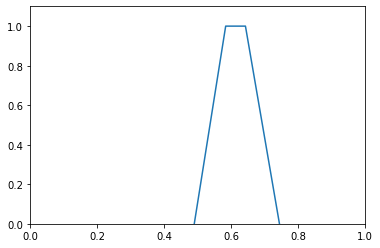

In [15]:
_,_,p = simulate_site_visitors_behavior(mean_review=3.5)
print("crisp p :",sum(p)/4)
plot_trapezoidal_fuzzy_number(*p,set_axes_lim=True)

Variations of $\tilde{p}$ with mean ratings

In [16]:
step = 0.01
mean_reviews = [0.5 + i*step for i in range(401)]
print(min(mean_reviews), max(mean_reviews))
p_1 = []
p_2 = []
p_3 = []
p_4 = []
for mr in mean_reviews:
    _, _, p = simulate_site_visitors_behavior(mr, n_visitors=20000)
    p_1.append(p[0])
    p_2.append(p[1])
    p_3.append(p[2])
    p_4.append(p[3])

0.5 4.5


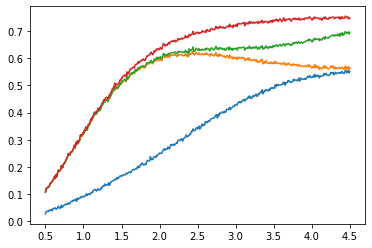

In [17]:
plt.plot(mean_reviews, p_1)
plt.plot(mean_reviews, p_2)
plt.plot(mean_reviews, p_3)
plt.plot(mean_reviews, p_4);

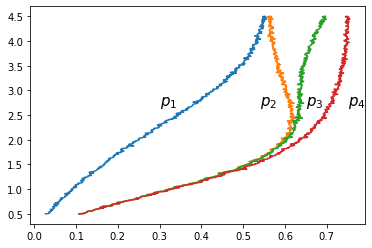

In [18]:
plt.plot(p_1, mean_reviews, label="p_1")
plt.plot(p_2, mean_reviews, label="p_2")
plt.plot(p_3, mean_reviews, label="p_3")
plt.plot(p_4, mean_reviews, label="p_4")
plt.text(0.3,2.7,'$p_1$',fontsize=15)
plt.text(0.54,2.7,'$p_2$',fontsize=15)
plt.text(0.65,2.7,'$p_3$',fontsize=15)
plt.text(0.75,2.7,'$p_4$',fontsize=15);